In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.rcParams['figure.figsize'] = 9, 6

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
img = plt.imread('cancer.jpg')
img_gray = rgb2gray(img)
img_crop = plt.imread('cancer_crop.jpg')

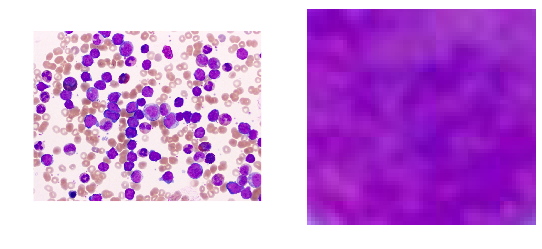

In [5]:
plt.figure(figsize=(9,5))

plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(img_crop)
plt.axis('off')
plt.show()

In [6]:
img = img.astype(float)
img_crop = img_crop.astype(float)

In [7]:
def RGB(array):
    return array[:,:,0], array[:,:,1], array[:,:,2]

In [8]:
R_img,G_img,B_img = RGB(img)
R_img_crop,G_img_crop,B_img_crop = RGB(img_crop)

### Normalized Chromaticity Coordinates (NCC)

In [9]:
def NCC(R,G,B):
    I = R + G + B
   
    I[I == 0] = 1000000
    
    r = R / I
    g = G / I
    b = 1 - r - g

    return r, g ,b 

In [10]:
r_img,g_img,b_img = NCC(R_img,G_img,B_img)

r_img_crop,g_img_crop,b_img_crop = NCC(R_img_crop,G_img_crop,B_img_crop)

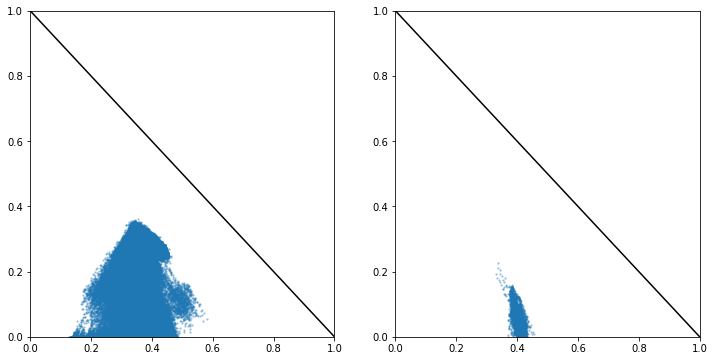

In [38]:
plt.figure(figsize=(12,6))

x = np.linspace(0,1,100)
y = -x+1

plt.subplot(121)
plt.scatter(r_img,g_img, s = 2, alpha=0.3)
plt.plot(x,y, color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.subplot(122)
plt.scatter(r_img_crop, g_img_crop, s = 2, alpha=0.3)
plt.plot(x,y, color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Parametric Segmentation

In [12]:
def PDF(x_img, x_crop):
    mu = np.mean(x_crop)
    sigma = np.std(x_crop)
    
    factor1 = (1 / (sigma * np.sqrt(2*np.pi)))
    factor2 = np.exp(-(x_img - mu)**2 / (2*(sigma**2)))
    
    return factor1*factor2

In [13]:
p_r = PDF(r_img, r_img_crop)
p_g = PDF(g_img, g_img_crop)

join_p = p_r * p_g

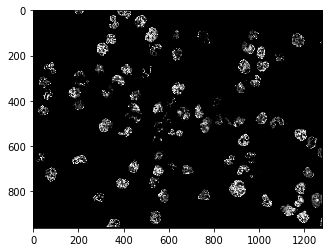

In [14]:
plt.imshow(join_p, cmap='gray')
plt.show()

### Non-parametric segmentation

20


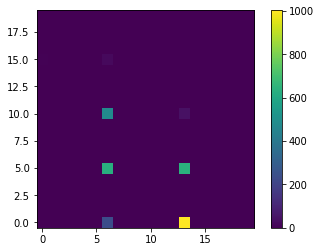

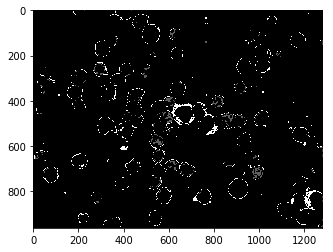

21


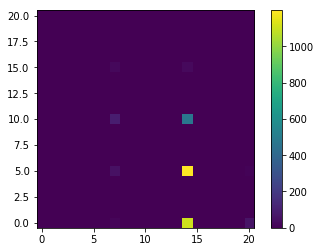

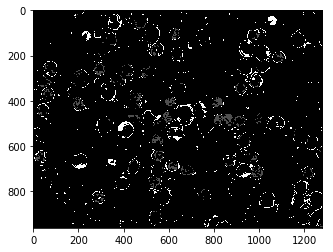

22


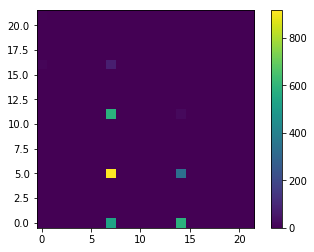

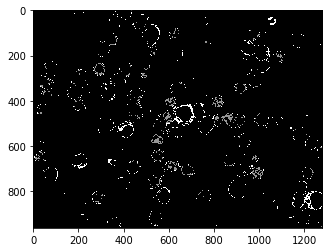

23


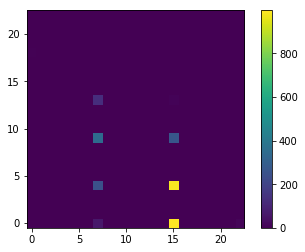

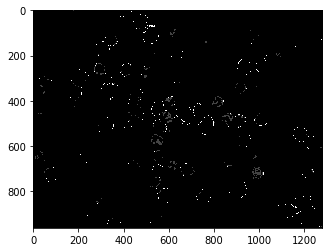

24


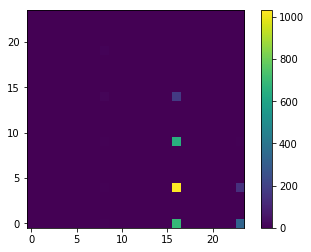

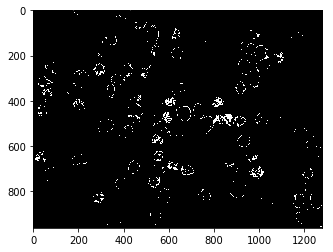

25


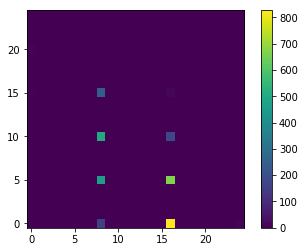

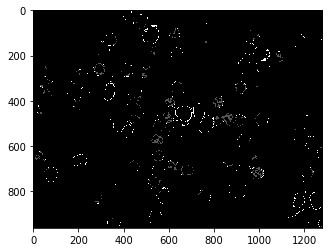

26


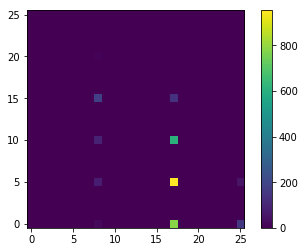

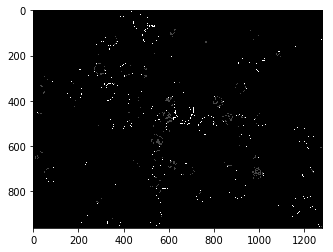

27


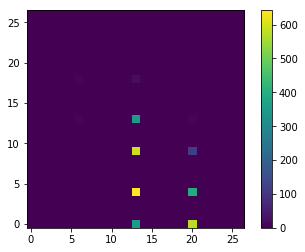

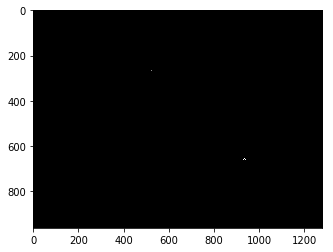

28


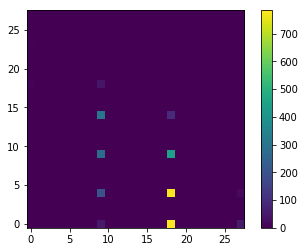

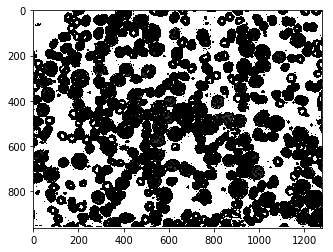

29


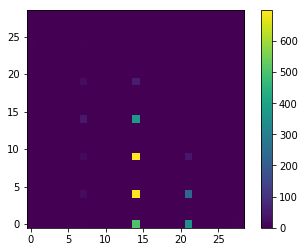

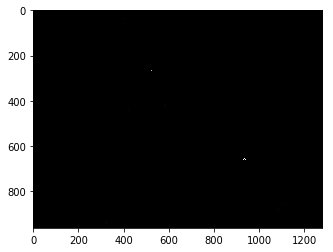

30


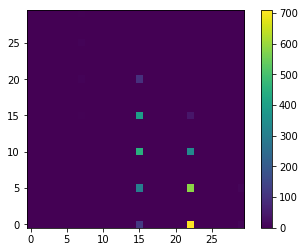

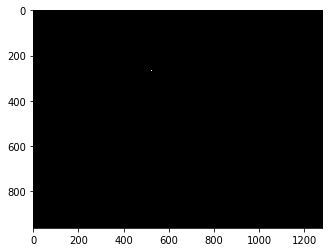

31


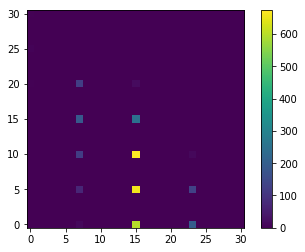

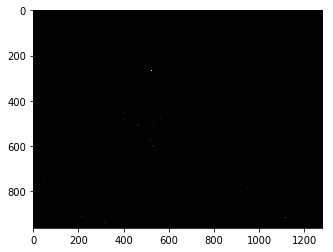

32


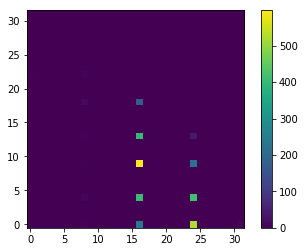

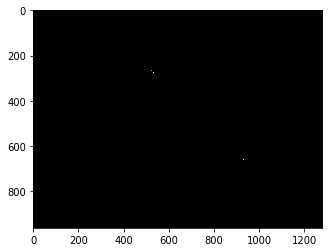

33


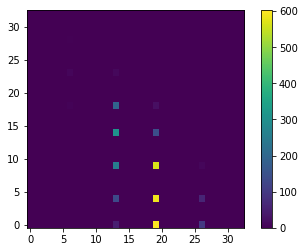

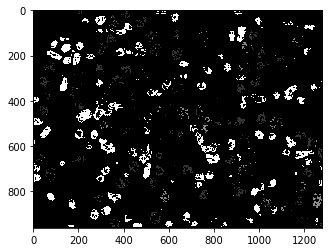

34


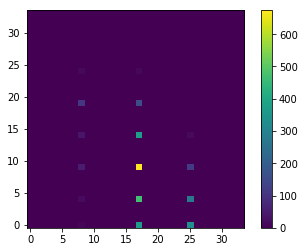

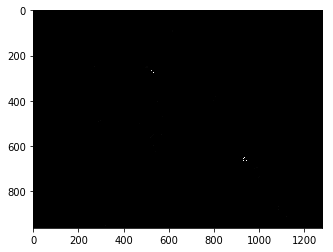

35


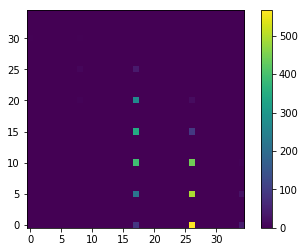

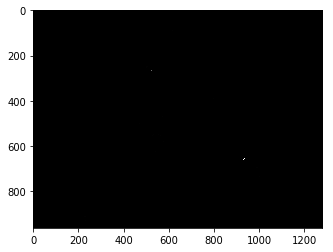

36


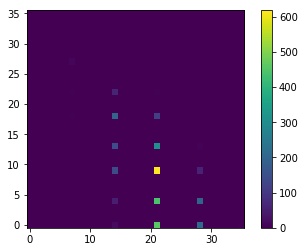

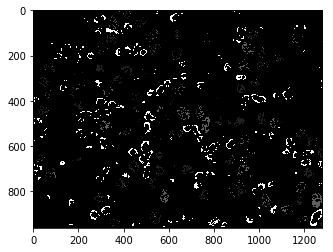

37


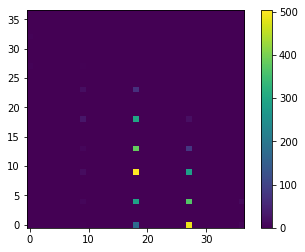

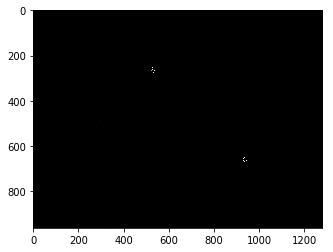

38


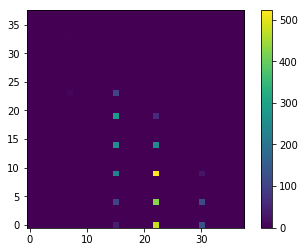

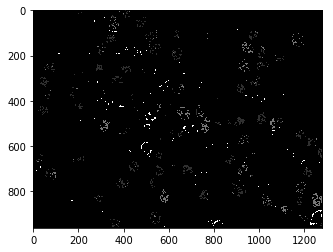

39


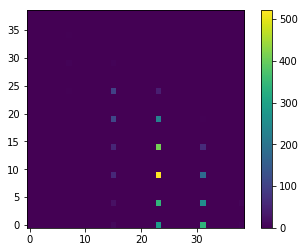

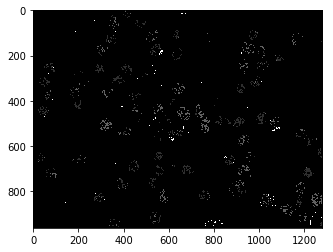

40


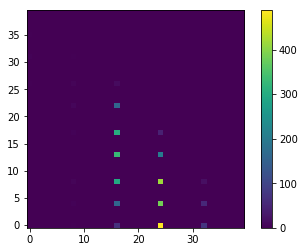

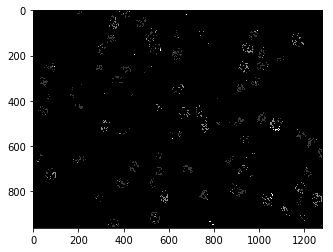

41


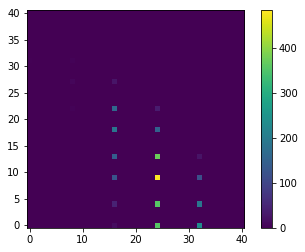

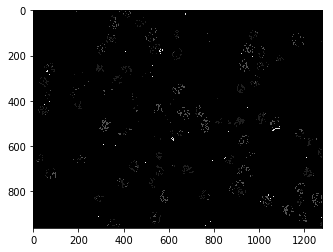

42


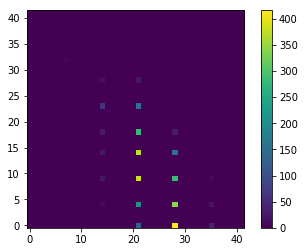

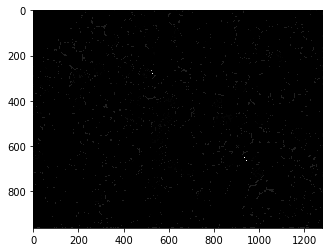

43


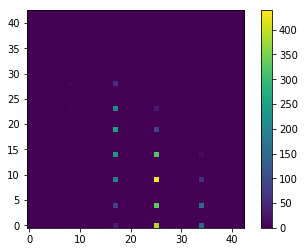

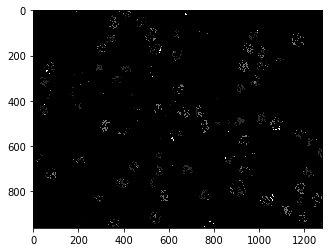

44


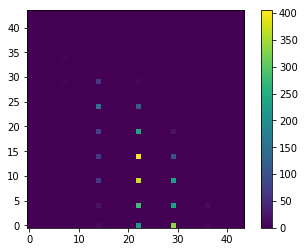

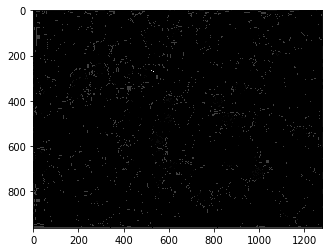

45


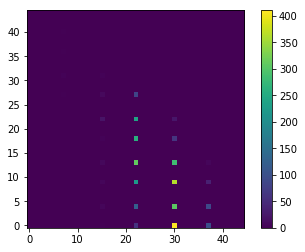

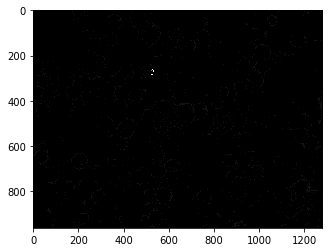

46


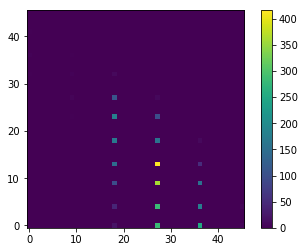

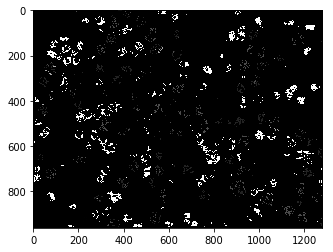

47


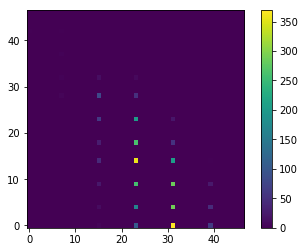

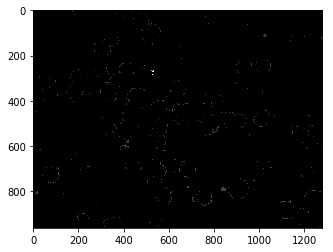

48


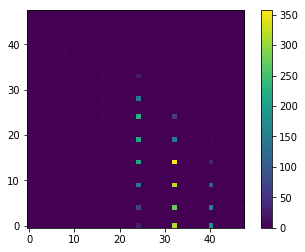

KeyboardInterrupt: 

In [15]:
constant = 50

for constant in np.arange(20,60):
    print(constant)
    r_img_crop_int = (r_img_crop * constant).astype(int)
    g_img_crop_int = (g_img_crop * constant).astype(int)

    H_img_crop, xedges_img_crop, yedge_img_crop = np.histogram2d(g_img_crop_int.flatten(),
                                                                 r_img_crop_int.flatten(),
                                                                 bins=constant)

    plt.imshow(H_img_crop, origin='lower')
    plt.colorbar()
    plt.show()

    r_img_int = (r_img * constant).astype(int)
    g_img_int = (g_img * constant).astype(int)

    x,y = r_img_int.shape

    Image = np.zeros([x, y])

    for i in range(x):
        for j in range(y):
            r_val = r_img_int[i][j]
            g_val = g_img_int[i][j]

            if r_val == constant:
                r_val -= 1
            if g_val == constant:
                g_val -= 1

            Image[i][j] = H_img_crop[g_val, r_val]

    plt.imshow(Image, cmap='gray')
    plt.show()

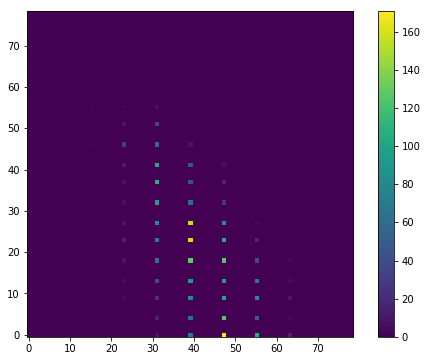

In [43]:
plt.imshow(H_img_crop, origin='lower')
plt.colorbar()
plt.show()

In [44]:
r_img_int = (r_img * constant).astype(int)
g_img_int = (g_img * constant).astype(int)

In [45]:
x,y = r_img_int.shape
x,y

(962, 1280)

In [46]:
Image = np.zeros([x, y])

In [47]:
for i in range(x):
    for j in range(y):
        r_val = r_img_int[i][j]
        g_val = g_img_int[i][j]
        
        if r_val == constant:
            r_val -= 1
        if g_val == constant:
            g_val -= 1
            
        Image[i][j] = H_img_crop[g_val, r_val]

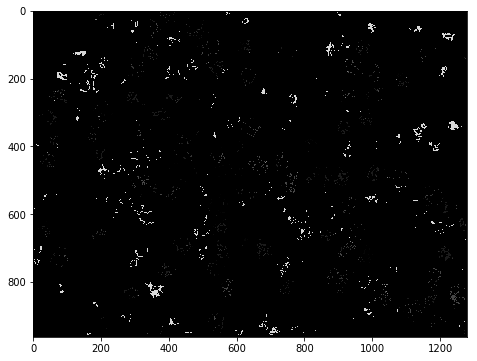

In [48]:
plt.imshow(Image, cmap='gray')

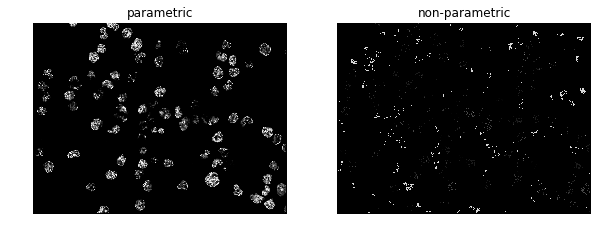

In [49]:
plt.figure(figsize=[10,6])

plt.subplot(121)
plt.imshow(join_p, cmap='gray')
plt.axis('off')
plt.title('parametric')
plt.subplot(122)
plt.imshow(Image, cmap='gray')
plt.axis('off')
plt.title('non-parametric')
plt.show()

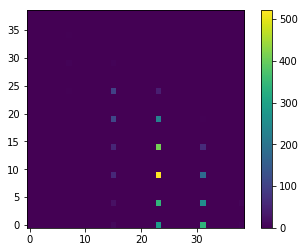

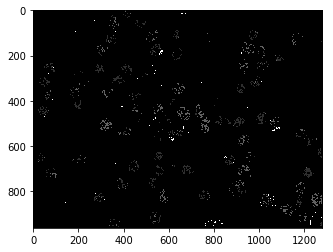

In [17]:
constant = 39

r_img_crop_int = (r_img_crop * constant).astype(int)
g_img_crop_int = (g_img_crop * constant).astype(int)

H_img_crop, xedges_img_crop, yedge_img_crop = np.histogram2d(g_img_crop_int.flatten(),
                                                             r_img_crop_int.flatten(),
                                                             bins=constant)

plt.imshow(H_img_crop, origin='lower')
plt.colorbar()
plt.show()

r_img_int = (r_img * constant).astype(int)
g_img_int = (g_img * constant).astype(int)

x,y = r_img_int.shape

Image = np.zeros([x, y])

for i in range(x):
    for j in range(y):
        r_val = r_img_int[i][j]
        g_val = g_img_int[i][j]

        if r_val == constant:
            r_val -= 1
        if g_val == constant:
            g_val -= 1

        Image[i][j] = H_img_crop[g_val, r_val]

plt.imshow(Image, cmap='gray')
plt.show()

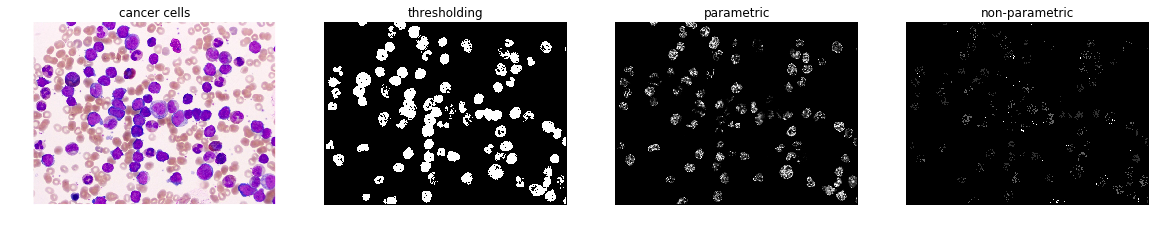

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(141)
plt.imshow(plt.imread('cancer.jpg'))
plt.axis('off')
plt.title('cancer cells')

plt.subplot(142)
plt.imshow(img_gray < 100, cmap = 'gray')
plt.axis('off')
plt.title('thresholding')

plt.subplot(143)
plt.imshow(join_p, cmap='gray')
plt.axis('off')
plt.title('parametric')

plt.subplot(144)
plt.imshow(Image, cmap='gray')
plt.axis('off')
plt.title('non-parametric')

plt.show()

In [19]:
array, bins = np.histogram(img_gray, bins = 255)

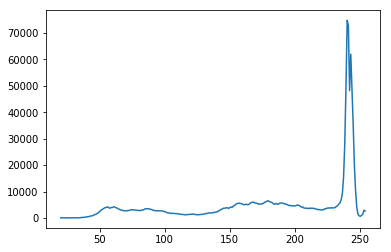

In [20]:
plt.plot(bins[:-1], array)